# Figure 2
## Libraries and Functions

In [1]:
library(ggplot2)
library(ggtree)
library(cowplot)
library(gridExtra)

Loading required package: treeio
ggtree v1.10.5  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
plot_tree <- function(site) {
    tree <- read.tree(paste("data/tree_", site, ".nwk", sep=""))
    dd <- read.table(paste("data/indicator_Type_", site, ".tsv", sep=""),header=1)
    colnames(dd)[1] = "taxa"
    row.names(dd) = NULL
    dd[,1] <- gsub('^X', '', dd[,1])
    tax <- read.table("data/indicator_taxonomy.tsv",sep="\t",header=1)
    #Mangle the names
    dd$class <- tax$Taxon[match(dd$taxa, tax$Feature.ID)]
    dd$class <- gsub("D_7__;D_8__;D_9__;D_10__;D_11__;D_12__;D_13__;D_14__;D_15__;D_16__", "", dd$class)
    dd$class <- gsub("D_6__;", "", dd$class)
    dd$class <- gsub("D_5__;", "", dd$class)
    dd$class <- gsub("D_4__;", "", dd$class)
    dd$class <- gsub("D_3__;", "", dd$class)
    dd$class <- gsub("D_2__;", "", dd$class)
    dd$class <- gsub("D_1__;", "", dd$class)
    for (i in 1:length(dd$class)){
       x<-unlist(strsplit(as.character(dd$class[i]),";"))
       if (grepl("uncultured", x[length(x)])) {
         x<-x[length(x)-1]
       } else {
         x<-x[length(x)]
       }
        dd$class[i] <- gsub("D_[0-6]__", "", x)
        if (dd$class[i] == "") {
            dd$class[i] <- tax$Taxon[match(dd$taxa, tax$Feature.ID)][i]
        }
    }
    lsum<-log(rowSums(dd[5:length(colnames(dd))-1]))
    dd$sums <- lsum
    p<-ggtree(tree, layout='circular')
    p <- p %<+% dd + geom_tiplab2(aes(color=cluster, label=class), size=1.5, hjust=-0.15) #+ geom_point(aes(size=sums, color=cluster), alpha=0.7)
    p <- p+theme(legend.position='bottom')+scale_colour_brewer(type='qual', name='Indicator Group', palette='Dark2')
    p
}

## Figure S1
All samples pooled

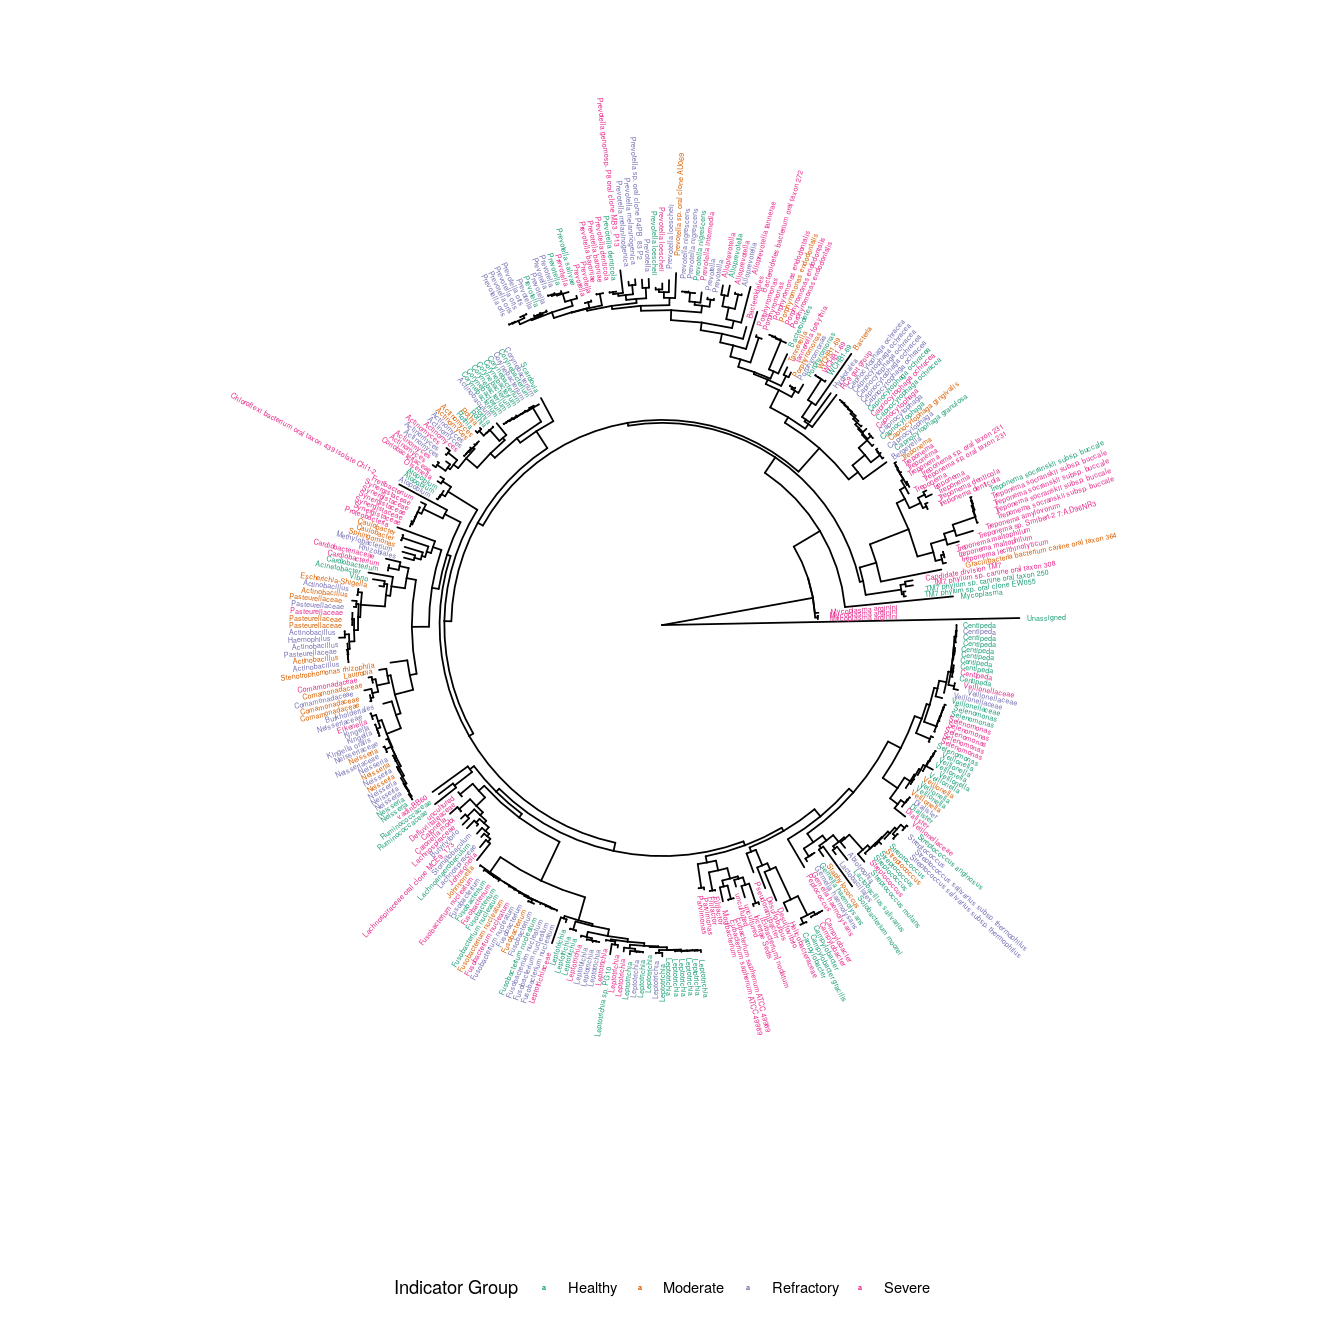

In [3]:
options(repr.plot.width=11, repr.plot.height=11)
plot_tree("all")+xlim(0,2)

## Figure 2
SubG, SupG, and Tongue separately

In [4]:
options(repr.plot.width=10, repr.plot.height=10)
a<-plot_tree("subg")+xlim(0,2)+scale_fill_grey(start=0.8,end=0)+scale_colour_grey(start=0.8,end=0)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [5]:
options(repr.plot.width=4, repr.plot.height=4)
b <- plot_tree("supg")+xlim(0,0.75)+scale_colour_grey(start=0.8,end=0)+scale_fill_grey(start=0.8,end=0)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


In [6]:
options(repr.plot.width=4, repr.plot.height=4)
c <- plot_tree("tongue")+xlim(0,1.25)+scale_fill_grey(start=0.8,end=0)+scale_colour_grey(start=0.8,end=0)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


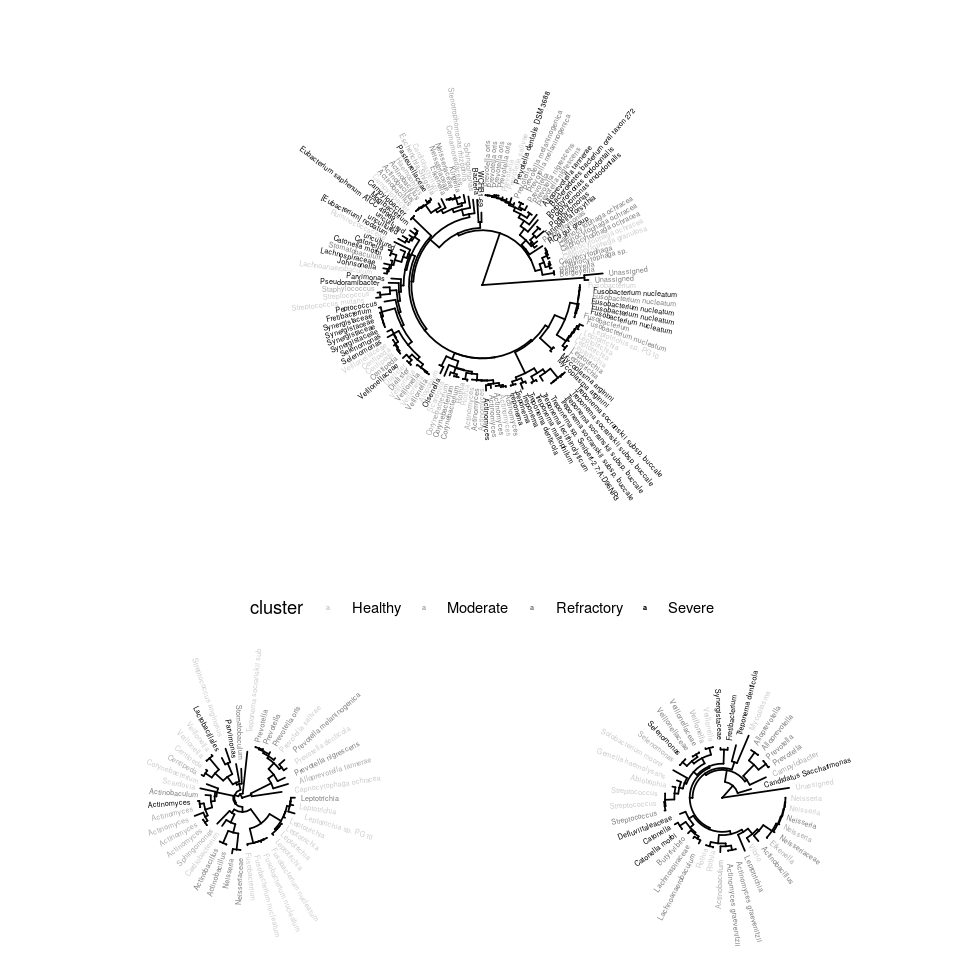

In [7]:
#pdf("Figure2.pdf")
options(repr.plot.width=8, repr.plot.height=8)
grid.arrange(a,arrangeGrob(b+theme(legend.position="none"),
                           c+theme(legend.position="none"), ncol=2), heights=c(1,0.5), nrow=2, padding=NULL)
#dev.off()